
<a href="https://colab.research.google.com/github/pr0fez/AI23-Deep_learning/blob/main/Exercises/E1-MLP_image_classification.ipynb" target="_parent"><img align="left" src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a> &nbsp; to see hints and answers.

---
# Multilayered perceptron (MLP) image classification exercises 

---
These are introductory exercises in Deep learning with focus in **MLP** for image classification.

<p class = "alert alert-info" role="alert"><b>Note</b> that sometimes you don't get exactly the same answer as I get, but it doesn't neccessarily mean it is wrong. Could be some parameters, randomization, that we have different. Also very important is that in the future there won't be any answer sheets, use your skills in data analysis, mathematics and statistics to back up your work.</p>

<p class = "alert alert-info" role="alert"><b>Note</b> that in cases when you start to repeat code, try not to. Create functions to reuse code instead. </p>

<p class = "alert alert-info" role="alert"><b>Remember</b> to use <b>descriptive variable, function, index </b> and <b> column names</b> in order to get readable code </p>

The number of stars (\*), (\*\*), (\*\*\*) denotes the difficulty level of the task

---

## 0. Fashion dataset (*)

Zalando has provided an MNIST dataset for fashion, with the format very similar to the original MNIST digits dataset. Start with loading this fashion dataset from TensorFlow Keras. 

&nbsp; a) Start visualizing some of the sample images 

&nbsp; b) Normalize the images to values between 0 and 1 

&nbsp; c) Visualize same images as before, do you see any difference? 

&nbsp; d) Make histogram of a sample image before and after normalization. What do you notice? 

&nbsp; e) Check if the dataset is balanced.

<details>

<summary>Hint</summary>

</details>

<details>

<summary>Answer</summary>

No answers here, discuss with your fellow data scientists to move forward if you're stuck.


</details>

---

In [120]:
import keras
from keras.models import Sequential
from keras import layers
from matplotlib import pyplot as plt
fashion_mnist = keras.datasets.fashion_mnist.load_data()

In [138]:
label_dict = {
    0: 'T-shirt/top',
    1: 'Trouser',
    2: 'Pullover',
    3: 'Dress',
    4: 'Coat',
    5: 'Sandal',
    6: 'Shirt',
    7: 'Sneaker',
    8: 'Bag',
    9: 'Ankle boot'
}

In [122]:
print(label_dict[0])

T-shirt/top


In [123]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist #unpacking the data
#train_images = train_images
#test_images = test_images

print(f"train images shape: {train_images.shape}")
print(f"train labels shape: {train_labels.shape}")
print(f"test images shape: {test_images.shape}")
print(f"test labels shape: {test_labels.shape}")

train images shape: (60000, 28, 28)
train labels shape: (60000,)
test images shape: (10000, 28, 28)
test labels shape: (10000,)


In [124]:
print(train_images[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1   1   0 200 232 23

In [173]:
print(label_dict[train_labels[5]])
label_dict[0]

Pullover


'T-shirt/top'

Plottar lite olika bilder

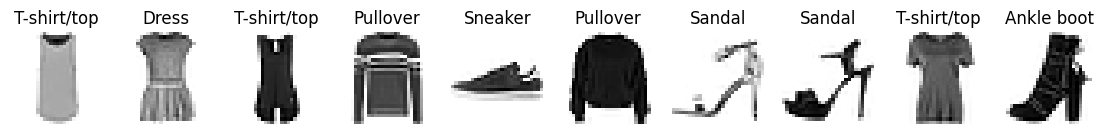

In [171]:
image_range = range(2, 12)

fig, axes = plt.subplots(1, 10, figsize=(14, 1.3))
for ax, idx in zip(axes, image_range):
    ax.set_axis_off()
    ax.set_title(label_dict[train_labels[idx]])
    ax.imshow(train_images[idx], cmap=plt.cm.binary)

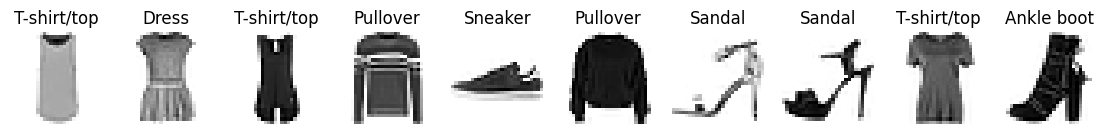

In [178]:
# funktion för att plotta 10 images i en range av images:
def plot_image(data, image_range):
    fig, axes = plt.subplots(1, 10, figsize=(14, 1.3))
    for ax, idx in zip(axes, image_range):
        ax.set_axis_off()
        ax.set_title(label_dict[train_labels[idx]])
        ax.imshow(data[idx], cmap=plt.cm.binary)

plot_image(train_images, image_range)

Histogram

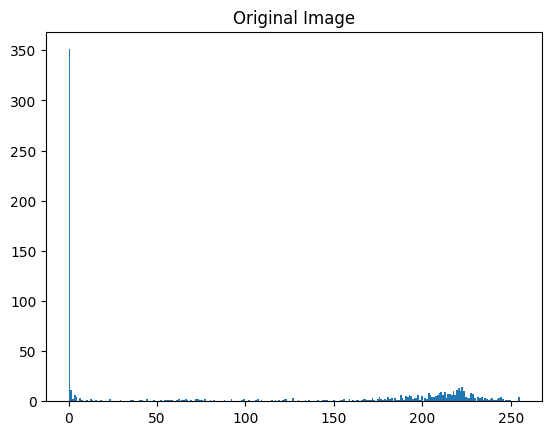

In [18]:
image_original = train_images[0]
plt.hist(image_original.flatten(), bins=256)
plt.title("Original Image")
plt.show()

Delar alla värden med 255 för att få dem mellan 0 och 1 istället för mellan 0 och 255.

In [19]:
train_images = train_images / 255.0
test_images = test_images / 255.0

Visualiserar bilderna igen. De ser likadana ut.

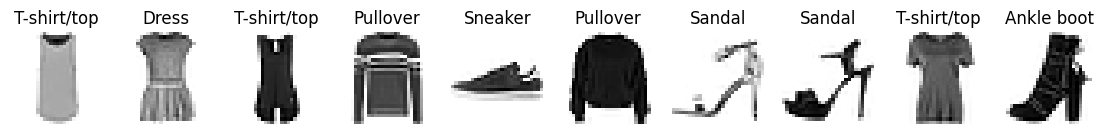

In [179]:
plot_image(train_images, image_range)

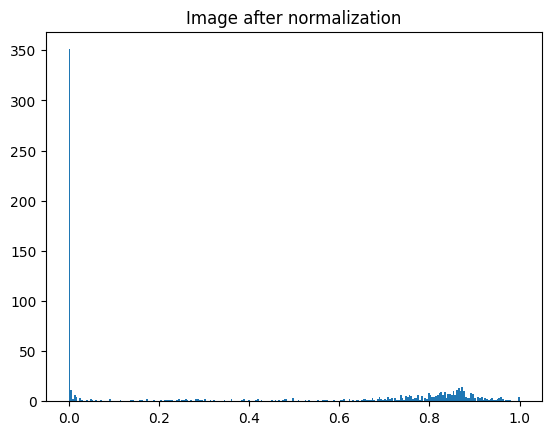

In [21]:
image_altered = image_original / 255.0
plt.hist(image_altered.flatten(), bins=256)
plt.title("Image after normalization")
plt.show()

Histogram på bilden där varje pixel har delats med 255.0

Kollar om datasetet är balanserat. Definitionen av balanserat är om det är lika många artiklar i varje klass. Detta datasetet är balanserat.


In [22]:
import numpy as np

unique_labels = np.unique(train_labels)
num_unique_labels = len(unique_labels)
print(f"Number of unique values in train_labels: {num_unique_labels}")
unique, counts = np.unique(train_labels, return_counts=True)
label_counts = dict(zip(unique, counts))
print("Counts of each unique value in train_labels:", label_counts)

Number of unique values in train_labels: 10
Counts of each unique value in train_labels: {np.uint8(0): np.int64(6000), np.uint8(1): np.int64(6000), np.uint8(2): np.int64(6000), np.uint8(3): np.int64(6000), np.uint8(4): np.int64(6000), np.uint8(5): np.int64(6000), np.uint8(6): np.int64(6000), np.uint8(7): np.int64(6000), np.uint8(8): np.int64(6000), np.uint8(9): np.int64(6000)}


## 1. MLP architecture (*)

As we know from the lectures, there are no certain mathematical rules for choosing number of nodes and hidden layers. What we can do is to do trial and error, but it would be expensive to not have any guidelines. Look at this [video](https://www.youtube.com/watch?v=bqBRET7tbiQ) and this [blog article ](https://towardsdatascience.com/17-rules-of-thumb-for-building-a-neural-network-93356f9930af) for rule of thumbs. Note that this will be computationally expensive on your laptop for larger networks and higher resolution images. Log in to kaggle and create a jupyter notebook inside kaggle and enable GPU. Remember to shut off the GPU after you're done with your work, you get a certain amount of quotas every week. 

&nbsp; a) Create a network with no hidden layers, fit the model for 50 epochs. Use 10000 samples for validation. 

&nbsp; b) Plot training loss vs validation loss and accuracy against validation accuracy. 

&nbsp; c) Repeat a) and b) for hidden_layers $\in \{1,2,3\}$

&nbsp; d) Add dropout layers and choose a rate of dropout, and perform a few experiments. Note that you shouldn't add dropout layers after input layer and after output layer. 

&nbsp; f) Define an experiment you want to investigate and perform it.

&nbsp; g) Choose a model from your experiments. 


<details>

<summary>Hint</summary>

d) Hidden layers are used to decrease overfitting. Can you see how it impacts your loss curves?

</details>

<details>

<summary>Answer</summary>

No answers here, discuss with your fellow data scientists to move forward if you're stuck.


</details>

---

In [23]:
from sklearn.model_selection import train_test_split

Skapar ett validation dataset på 10.000 baserat på training dataset.

In [24]:
train_images_val, valid_images, train_labels_val, valid_labels = train_test_split(train_images, train_labels, test_size=1/6)
train_images.shape, train_images_val.shape, valid_images.shape, test_images.shape

((60000, 28, 28), (50000, 28, 28), (10000, 28, 28), (10000, 28, 28))

Reshape'ar så att det blir en vektor istället för en matris.

In [25]:
train_images = train_images.reshape((60000, 28*28))
train_images_val = train_images_val.reshape((50000, 28*28))
valid_images = valid_images.reshape((10000, 28*28))
test_images = test_images.reshape((10000, 28*28))
train_images.shape, train_images_val.shape, valid_images.shape, test_images.shape

((60000, 784), (50000, 784), (10000, 784), (10000, 784))

Skapar en shallow model helt utan hidden layers.

In [26]:
shallow_model = keras.models.Sequential([
    layers.Dense(10, activation='softmax')
])

#model = keras.models.Sequential(name="Shallow_network")
#model.add(layers.InputLayer((train_labels.shape[1],), name="input_layer"))
#model.add(layers.Dense(512, activation='relu', name="hidden-layer-1"))
#model.add(layers.Dense(32, activation='sigmoid', name="hidden-layer-2"))
#model.add(layers.Dense(10, name="output-layer"))

In [27]:
shallow_model.compile(loss="sparse_categorical_crossentropy", optimizer='rmsprop', metrics=['accuracy'])

In [28]:
shallow_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [29]:
shallow_model.fit(train_images_val, train_labels_val, epochs=50, validation_data=(valid_images, valid_labels))

Epoch 1/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 668us/step - accuracy: 0.7369 - loss: 0.7787 - val_accuracy: 0.8272 - val_loss: 0.4976
Epoch 2/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 565us/step - accuracy: 0.8379 - loss: 0.4768 - val_accuracy: 0.8417 - val_loss: 0.4625
Epoch 3/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 575us/step - accuracy: 0.8459 - loss: 0.4550 - val_accuracy: 0.8459 - val_loss: 0.4426
Epoch 4/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 599us/step - accuracy: 0.8523 - loss: 0.4378 - val_accuracy: 0.8479 - val_loss: 0.4406
Epoch 5/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 655us/step - accuracy: 0.8572 - loss: 0.4252 - val_accuracy: 0.8492 - val_loss: 0.4273
Epoch 6/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 657us/step - accuracy: 0.8585 - loss: 0.4203 - val_accuracy: 0.8502 - val_loss: 0.4296
Epoch 7/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 567us/step - accuracy: 0.8607 - loss: 0.4169 - val_accuracy: 0.8423 - val_loss: 0.4456
Epoch 8/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 551us/step - accuracy: 0.8583 -

In [30]:
shallow_model.history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

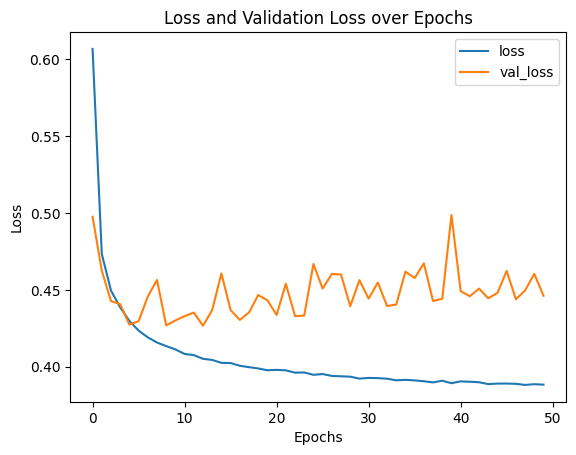

In [31]:
# Plotting loss and validation loss over epochs
plt.plot(shallow_model.history.history['loss'], label='loss')
plt.plot(shallow_model.history.history['val_loss'], label='val_loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss and Validation Loss over Epochs')
plt.legend()
plt.show()

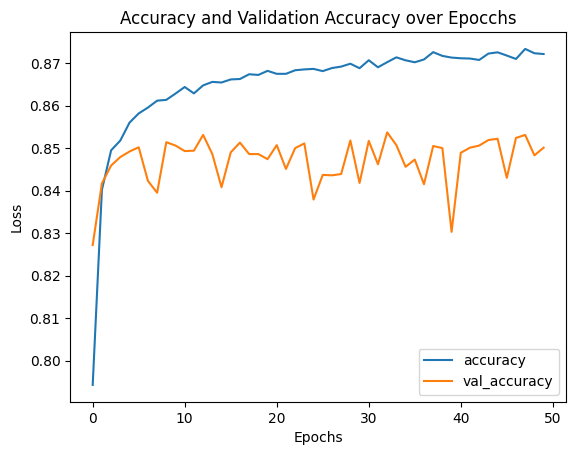

In [32]:
# Plotting accurazy and validation accurazy over epochs
plt.plot(shallow_model.history.history['accuracy'], label='accuracy')
plt.plot(shallow_model.history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Accuracy and Validation Accuracy over Epocchs')
plt.legend()
plt.show()

Skapar en modell med ett hidden layer.

In [38]:
one_hidden_model = keras.models.Sequential([
    layers.Dense(32, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [39]:
one_hidden_model.compile(loss="sparse_categorical_crossentropy", optimizer='rmsprop', metrics=['accuracy'])

In [40]:
one_hidden_model.fit(train_images_val, train_labels_val, epochs=50, validation_data=(valid_images, valid_labels))

Epoch 1/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 829us/step - accuracy: 0.7449 - loss: 0.7486 - val_accuracy: 0.8456 - val_loss: 0.4375
Epoch 2/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 644us/step - accuracy: 0.8444 - loss: 0.4450 - val_accuracy: 0.8543 - val_loss: 0.4163
Epoch 3/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 637us/step - accuracy: 0.8588 - loss: 0.3973 - val_accuracy: 0.8492 - val_loss: 0.4255
Epoch 4/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 644us/step - accuracy: 0.8681 - loss: 0.3742 - val_accuracy: 0.8651 - val_loss: 0.3872
Epoch 5/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 679us/step - accuracy: 0.8713 - loss: 0.3611 - val_accuracy: 0.8622 - val_loss: 0.3826
Epoch 6/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 687us/step - accuracy: 0.8750 - loss: 0.3474 - val_accuracy: 0.8540 - val_loss: 0.4049
Epoch 7/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 654us/step - accuracy: 0.8814 - loss: 0.3340 - val_accuracy: 0.8471 - val_loss: 0.4302
Epoch 8/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 614us/step - accuracy: 0.8830 -

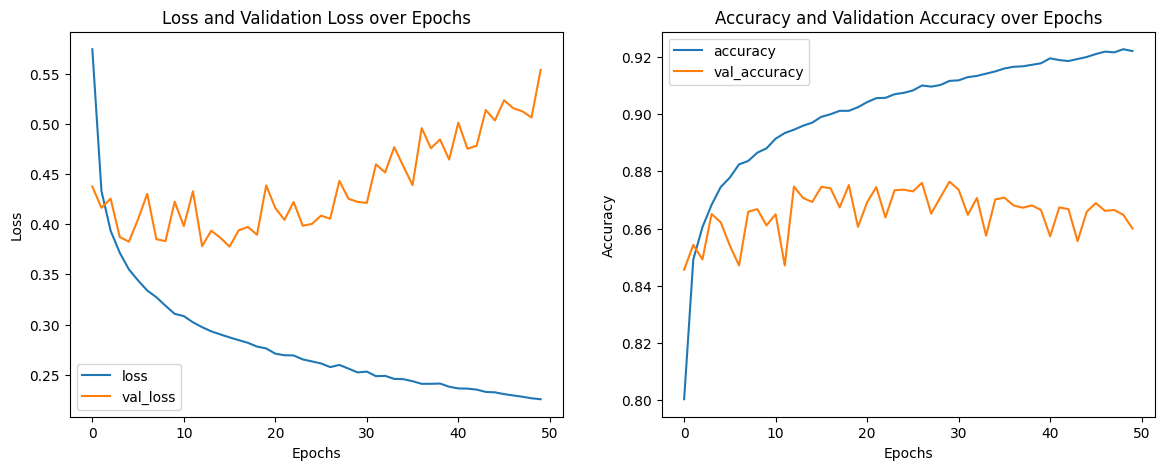

In [41]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# Plotting loss and validation loss over epochs
ax1.plot(one_hidden_model.history.history['loss'], label='loss')
ax1.plot(one_hidden_model.history.history['val_loss'], label='val_loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.set_title('Loss and Validation Loss over Epochs')
ax1.legend()

# Plotting accuracy and validation accuracy over epochs
ax2.plot(one_hidden_model.history.history['accuracy'], label='accuracy')
ax2.plot(one_hidden_model.history.history['val_accuracy'], label='val_accuracy')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.set_title('Accuracy and Validation Accuracy over Epochs')
ax2.legend()

plt.show()

Neural network with two hidden layers.

In [42]:
two_hidden_model = keras.models.Sequential([
    layers.Dense(128, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [43]:
two_hidden_model.compile(loss="sparse_categorical_crossentropy", optimizer='rmsprop', metrics=['accuracy'])

In [44]:
two_hidden_model.fit(train_images_val, train_labels_val, epochs=50, validation_data=(valid_images, valid_labels))

Epoch 1/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7598 - loss: 0.6836 - val_accuracy: 0.8378 - val_loss: 0.4369
Epoch 2/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8555 - loss: 0.4029 - val_accuracy: 0.8571 - val_loss: 0.4052
Epoch 3/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 944us/step - accuracy: 0.8716 - loss: 0.3499 - val_accuracy: 0.8637 - val_loss: 0.3779
Epoch 4/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 941us/step - accuracy: 0.8818 - loss: 0.3312 - val_accuracy: 0.8666 - val_loss: 0.3804
Epoch 5/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8869 - loss: 0.3167 - val_accuracy: 0.8740 - val_loss: 0.3552
Epoch 6/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8914 - loss: 0.3047 - val_accuracy: 0.8568 - val_loss: 0.4262
Epoch 7/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 958us/step - accuracy: 0.8902 - loss: 0.3030 - val_accuracy: 0.8693 - val_loss: 0.3853
Epoch 8/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8941 - loss: 0.2

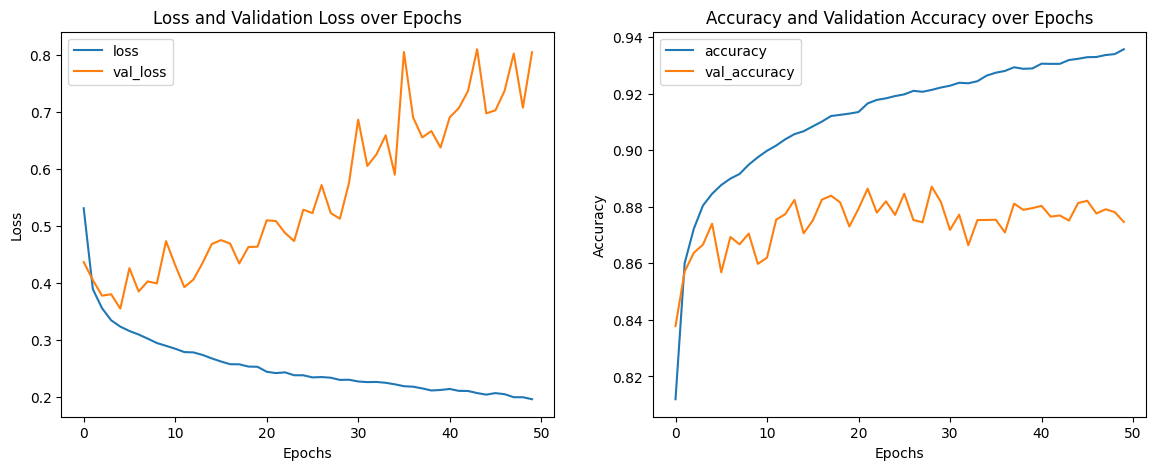

In [45]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# Plotting loss and validation loss over epochs
ax1.plot(two_hidden_model.history.history['loss'], label='loss')
ax1.plot(two_hidden_model.history.history['val_loss'], label='val_loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.set_title('Loss and Validation Loss over Epochs')
ax1.legend()

# Plotting accuracy and validation accuracy over epochs
ax2.plot(two_hidden_model.history.history['accuracy'], label='accuracy')
ax2.plot(two_hidden_model.history.history['val_accuracy'], label='val_accuracy')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.set_title('Accuracy and Validation Accuracy over Epochs')
ax2.legend()

plt.show()

Create a NN with three hidden layers.

In [46]:
three_hidden_model = keras.models.Sequential([
    layers.Dense(512, activation='relu'),
    layers.Dense(128, activation='relu'),
    layers.Dense(32, activation='sigmoid'),
    layers.Dense(10, activation='softmax')
])

In [47]:
three_hidden_model.compile(loss="sparse_categorical_crossentropy", optimizer='rmsprop', metrics=['accuracy'])

In [48]:
three_hidden_model.fit(train_images_val, train_labels_val, epochs=25, validation_data=(valid_images, valid_labels))

Epoch 1/25
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.7474 - loss: 0.7906 - val_accuracy: 0.8346 - val_loss: 0.4427
Epoch 2/25
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8541 - loss: 0.4049 - val_accuracy: 0.8451 - val_loss: 0.4087
Epoch 3/25
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8683 - loss: 0.3619 - val_accuracy: 0.8663 - val_loss: 0.3795
Epoch 4/25
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8789 - loss: 0.3343 - val_accuracy: 0.8649 - val_loss: 0.3782
Epoch 5/25
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8836 - loss: 0.3272 - val_accuracy: 0.8744 - val_loss: 0.3510
Epoch 6/25
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8833 - loss: 0.3238 - val_accuracy: 0.8691 - val_loss: 0.3732
Epoch 7/25
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8912 - loss: 0.3095 - val_accuracy: 0.8687 - val_loss: 0.3713
Epoch 8/25
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8923 - loss: 0.3085 - 

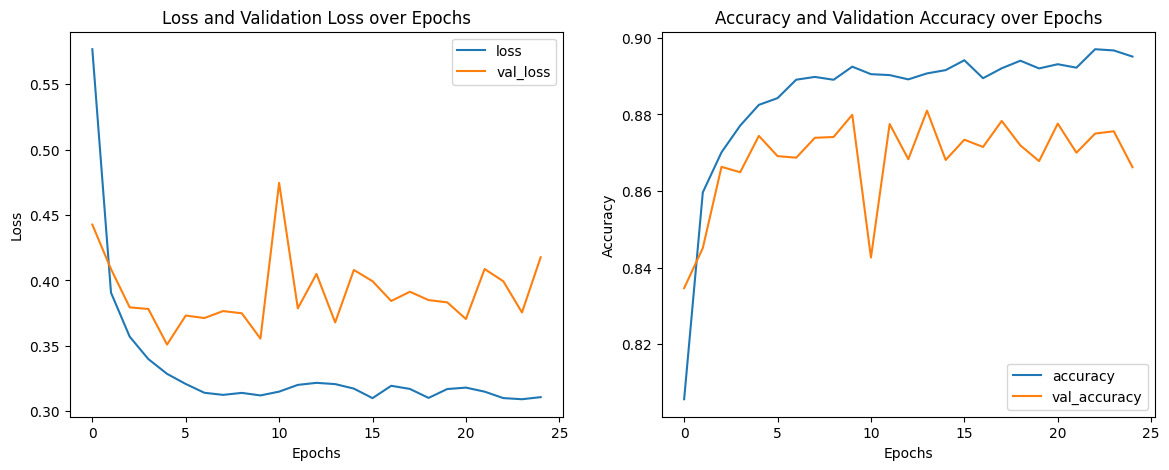

In [49]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# Plotting loss and validation loss over epochs
ax1.plot(three_hidden_model.history.history['loss'], label='loss')
ax1.plot(three_hidden_model.history.history['val_loss'], label='val_loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.set_title('Loss and Validation Loss over Epochs')
ax1.legend()

# Plotting accuracy and validation accuracy over epochs
ax2.plot(three_hidden_model.history.history['accuracy'], label='accuracy')
ax2.plot(three_hidden_model.history.history['val_accuracy'], label='val_accuracy')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.set_title('Accuracy and Validation Accuracy over Epochs')
ax2.legend()

plt.show()

## 2. Predict and evaluate (*)

Use the model you've chosen from 1. and train on all training data. Also add early stopping to further avoid overfitting. Predict on the test data and evaluate your model.

&nbsp; a) Which item was hardest to classify? Do you have any ideas of why?

&nbsp; b) Show a few samples from each category that was misclassified.

&nbsp; c) Create a folder through Python called Misclassified and save the misclassified images there. 

<details>

<summary>Answer</summary>

No answers here, discuss with your fellow data scientists to move forward if you're stuck.


</details>


Jag tycker att two_hidden_model verkar ge bäst resultat. Skapar en sådan för att köra all träningsdata på.

In [65]:
two_hidden_model = keras.models.Sequential([
    layers.Dense(128, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [66]:
two_hidden_model.compile(loss="sparse_categorical_crossentropy", optimizer='rmsprop', metrics=['accuracy'])

In [67]:
from keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

two_hidden_model.fit(train_images, train_labels, epochs=25, callbacks=[early_stopping], validation_data=(train_images_val, train_labels_val))

Epoch 1/25
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.7710 - loss: 0.6544 - val_accuracy: 0.8612 - val_loss: 0.3898
Epoch 2/25
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8581 - loss: 0.3895 - val_accuracy: 0.8826 - val_loss: 0.3261
Epoch 3/25
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8736 - loss: 0.3445 - val_accuracy: 0.8775 - val_loss: 0.3339
Epoch 4/25
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8787 - loss: 0.3355 - val_accuracy: 0.8752 - val_loss: 0.3413
Epoch 5/25
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8843 - loss: 0.3215 - val_accuracy: 0.8895 - val_loss: 0.3066
Epoch 6/25
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8887 - loss: 0.3114 - val_accuracy: 0.8921 - val_loss: 0.2937
Epoch 7/25
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8904 - loss: 0.3073 - val_accuracy: 0.8866 - val_loss: 0.3425
Epoch 8/25
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8925 - loss: 0.3005 - 

Predikterar på testdatan, evaluerar modellen:

In [68]:
y_pred = two_hidden_model.predict(test_images)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 841us/step


In [74]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import seaborn as sns


print(classification_report(test_labels, y_pred.argmax(axis=1), target_names=[str(i) for i in unique_labels]))

              precision    recall  f1-score   support

           0       0.84      0.84      0.84      1000
           1       0.99      0.97      0.98      1000
           2       0.76      0.81      0.79      1000
           3       0.85      0.91      0.88      1000
           4       0.78      0.79      0.78      1000
           5       0.99      0.94      0.96      1000
           6       0.73      0.65      0.69      1000
           7       0.90      0.98      0.94      1000
           8       0.98      0.97      0.97      1000
           9       0.97      0.92      0.95      1000

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000



In [79]:
print(f"Accuracy Score: {accuracy_score(test_labels, y_pred.argmax(axis=1))}")

Accuracy Score: 0.877


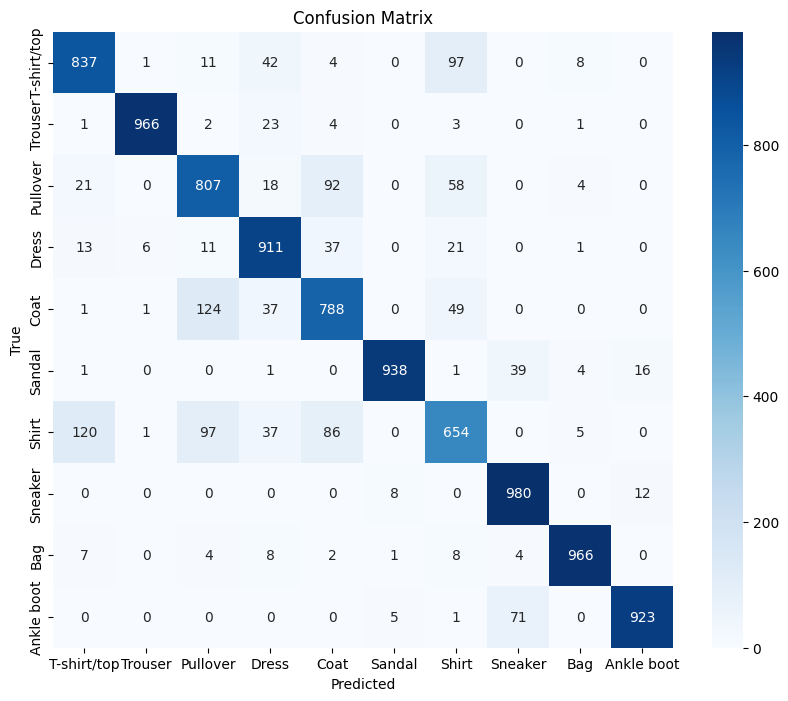

In [ ]:
# Generate confusion matrix
cm = confusion_matrix(test_labels, y_pred.argmax(axis=1))

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_dict.values(), yticklabels=label_dict.values())
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [88]:
print((y_pred.argmax(axis=1)))

[9 2 1 ... 8 1 5]


In [206]:
print(test_labels)
type(test_labels)

[9 2 1 ... 8 1 5]


numpy.ndarray

Identifierar 10 felpredikterade items:

In [220]:
indices_zero = np.where(test_labels == 1)[0]
faulty_indices = []

for index in indices_zero:
    if test_labels[index] - y_pred.argmax(axis=1)[index] != 0:
        faulty_indices.append(int(index))
 
print(faulty_indices)

[192, 409, 663, 701, 787, 1091, 1659, 1990, 2396, 2478, 2741, 2951, 3974, 5327, 5533, 5597, 5746, 5760, 5761, 6117, 6331, 6656, 7555, 7876, 8074, 8156, 8757, 8768, 9071, 9095, 9485, 9647, 9666, 9891]


In [221]:
# randomly select 10 faulty indices
import random
random.seed(42)
random_faulty_indices = random.sample(faulty_indices, 10)
random_faulty_indices

[1990, 409, 5760, 9891, 9485, 787, 7876, 701, 6656, 8768]

Plottar de felpredikterade items:

In [222]:
test_labels_list = list(test_labels)
y_pred_list = list(y_pred.argmax(axis=1))

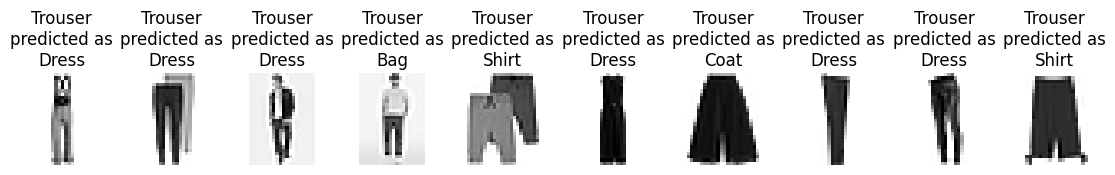

In [228]:
from datetime import datetime

index = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


def plot_image_2(data, image_range):
    fig, axes = plt.subplots(1, 10, figsize=(14, 1.3))
    for ax, idx in zip(axes, image_range):
        ax.set_axis_off()
        ax.set_title(f"{label_dict[test_labels[idx]]}\npredicted as\n{label_dict[y_pred[idx].argmax()]}")
        ax.imshow(data[idx], cmap=plt.cm.binary)
    timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")
    plt.savefig(f"./E1-misclassified/misclassified_{timestamp}.jpg")


plot_image_2(test_images, random_faulty_indices)

---

Kokchun Giang

[LinkedIn][linkedIn_kokchun]

[GitHub portfolio][github_portfolio]

[linkedIn_kokchun]: https://www.linkedin.com/in/kokchungiang/
[github_portfolio]: https://github.com/kokchun/Portfolio-Kokchun-Giang

---